<a href="https://colab.research.google.com/github/gitHubAndyLee2020/OpenAI_Gym_Bipedal_Walker_RL/blob/main/bipedal_walker_normal_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 19.3 MB/s eta 0:00:00


In [2]:
!pip install swig
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373071 sha256=3203af424e0fee9a9da13d085e6ba090d1afce0541e487691cacc50816707a25
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [3]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install matplotlib
!pip install pyvirtualdisplay
!pip install tf-agents[reverb]
!pip install pyglet
!pip install pybullet

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [517 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,016 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,144 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.9 kB]
Get:13 h

# Set-up

In [4]:
import base64
import imageio
import IPython
import matplotlib.pyplot as plt
import os
import reverb
import tempfile
import PIL.Image
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.ddpg import critic_network
from tf_agents.agents.sac import sac_agent
from tf_agents.agents.sac import tanh_normal_projection_network
from tf_agents.environments import suite_pybullet
from tf_agents.metrics import py_metrics
from tf_agents.networks import actor_distribution_network
from tf_agents.policies import greedy_policy
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_py_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.train import actor
from tf_agents.train import learner
from tf_agents.train import triggers
from tf_agents.train.utils import spec_utils
from tf_agents.train.utils import strategy_utils
from tf_agents.train.utils import train_utils

In [5]:
tempdir = tempfile.gettempdir()

In [6]:
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

# Environment Demo

In [7]:
import gym
import tf_agents.environments.suite_gym as suite_gym

# List all available gym environments
available_gym_envs = list(gym.envs.registry.env_specs.keys())
print("Available OpenAI Gym environments:")
for env_name in available_gym_envs:
    print(env_name)

Available OpenAI Gym environments:
CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v1
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
Reacher-v2
Pusher-v2
InvertedPendulum-v2
InvertedDoublePendulum-v2
HalfCheetah-v2
HalfCheetah-v3
Hopper-v2
Hopper-v3
Swimmer-v2
Swimmer-v3
Walker2d-v2
Walker2d-v3
Ant-v2
Ant-v3
Humanoid-v2
Humanoid-v3
HumanoidStandup-v2
HumanoidDeepMimicBackflipBulletEnv-v1
HumanoidDeepMimicWalkBulletEnv-v1
CartPoleBulletEnv-v1
CartPoleContinuousBulletEnv-v0
MinitaurBulletEnv-v0
MinitaurBulletDuckEnv-v0
MinitaurExtendedEnv-v0
MinitaurReactiveEnv-v0
MinitaurBallGymEnv-v0
MinitaurTrottingEnv-v0
MinitaurStandGymEnv-v0
MinitaurAlternatingLegsEnv-v0
MinitaurFourLegStandEnv-v0
RacecarBulletEnv-v0
RacecarZedBulletEnv-v0
KukaBulletEnv-v0
KukaCamBulletEnv-v0
KukaDiverseObjectGrasping-v0
InvertedPendulumBulletEnv-v0
InvertedDoublePe

In [8]:
env_name = 'BipedalWalker-v3'
env = suite_gym.load(env_name)

In [9]:
time_step = env.reset()
print('Time step:')
print(time_step)

Time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([ 2.7473550e-03, -1.9936406e-05,  1.5508498e-03, -1.5999865e-02,
        9.1876775e-02, -2.0465944e-03,  8.6031640e-01,  2.9150534e-03,
        1.0000000e+00,  3.2281611e-02, -2.0464538e-03,  8.5386807e-01,
        1.4473709e-03,  1.0000000e+00,  4.4081411e-01,  4.4582021e-01,
        4.6142289e-01,  4.8955029e-01,  5.3410292e-01,  6.0246116e-01,
        7.0914906e-01,  8.8593203e-01,  1.0000000e+00,  1.0000000e+00],
      dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})


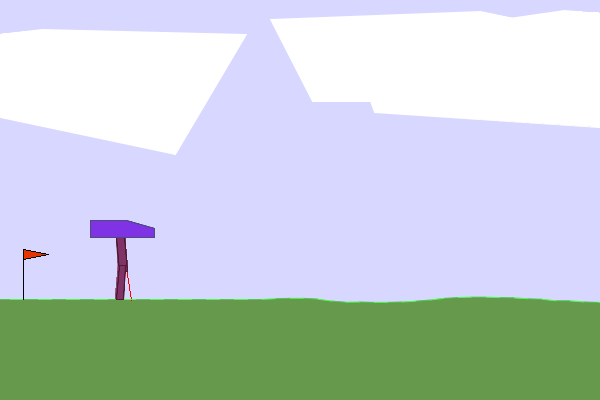

In [10]:
PIL.Image.fromarray(env.render())

### Action Space

Actions are motor speed values in the [-1, 1] range for each of the 4 joints at both hips and knees.

In [11]:
print('Action Spec:')
print(env.action_spec())

Action Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='action', minimum=-1.0, maximum=1.0)


### Observation Space

State consists of hull angle speed, angular velocity, horizontal speed, vertical speed, position of joints and joints angular speed, legs contact with ground, and 10 lidar rangefinder measurements. There are no coordinates in the state vector.

In [12]:
print('Observation Spec:')
print(env.time_step_spec().observation)

Observation Spec:
BoundedArraySpec(shape=(24,), dtype=dtype('float32'), name='observation', minimum=-3.4028234663852886e+38, maximum=3.4028234663852886e+38)


### Rewards

Reward is given for moving forward, totaling 300+ points up to the far end. If the robot falls, it gets -100. Applying motor torque costs a small amount of points. A more optimal agent will get a better score.

In [13]:
print('Reward Spec:')
print(env.time_step_spec().reward)

Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


# Model

In [14]:
num_iterations = 100000

initial_collect_steps = 10000
collect_steps_per_iteration = 1
replay_buffer_capacity = 10000

batch_size = 256

critic_learning_rate = 3e-4
actor_learning_rate = 3e-4
alpha_learning_rate = 3e-4
target_update_tau = 0.005
target_update_period = 1
gamma = 0.99
reward_scale_factor = 1.0

actor_fc_layer_params = (256, 256)
critic_joint_fc_layer_params = (256, 256)

log_interval = 5000

num_eval_episodes = 20
eval_interval = 10000

policy_save_interval = 5000

In [15]:
collect_env = suite_pybullet.load(env_name)
eval_env = suite_pybullet.load(env_name)

In [16]:
strategy = strategy_utils.get_strategy(tpu=False, use_gpu=True)

In [17]:
observation_spec, action_spec, time_step_spec = (
    spec_utils.get_tensor_specs(collect_env)
)

In [18]:
with strategy.scope():
  critic_net = critic_network.CriticNetwork(
      (observation_spec, action_spec),
      observation_fc_layer_params=None,
      action_fc_layer_params=None,
      joint_fc_layer_params=critic_joint_fc_layer_params,
      kernel_initializer="glorot_uniform",
      last_kernel_initializer="glorot_uniform"
  )

In [19]:
with strategy.scope():
  actor_net = actor_distribution_network.ActorDistributionNetwork(
      observation_spec,
      action_spec,
      fc_layer_params=actor_fc_layer_params,
      continuous_projection_net=(
          tanh_normal_projection_network.TanhNormalProjectionNetwork
      )
  )

In [20]:
with strategy.scope():
  train_step = train_utils.create_train_step()

  tf_agent = sac_agent.SacAgent(
      time_step_spec,
      action_spec,
      actor_network=actor_net,
      critic_network=critic_net,
      actor_optimizer=tf.keras.optimizers.Adam(
          learning_rate=actor_learning_rate
      ),
      critic_optimizer=tf.keras.optimizers.Adam(
          learning_rate=alpha_learning_rate
      ),
      alpha_optimizer=tf.keras.optimizers.Adam(
          learning_rate=alpha_learning_rate
      ),
      target_update_tau=target_update_tau,
      target_update_period=target_update_period,
      td_errors_loss_fn=tf.math.squared_difference,
      gamma=gamma,
      reward_scale_factor=reward_scale_factor,
      train_step_counter=train_step
  )

  tf_agent.initialize()

In [21]:
table_name = "uniform_table"
table = reverb.Table(
    table_name,
    max_size=replay_buffer_capacity,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1)
)

reverb_server = reverb.Server([table])

In [22]:
reverb_replay = reverb_replay_buffer.ReverbReplayBuffer(
    tf_agent.collect_data_spec,
    sequence_length=2,
    table_name=table_name,
    local_server=reverb_server)

In [23]:
dataset = reverb_replay.as_dataset(
      sample_batch_size=batch_size, num_steps=2).prefetch(50)
experience_dataset_fn = lambda: dataset

In [24]:
tf_eval_policy = tf_agent.policy
eval_policy = py_tf_eager_policy.PyTFEagerPolicy(
    tf_eval_policy, use_tf_function=True
)

In [25]:
tf_collect_policy = tf_agent.collect_policy
collect_policy = py_tf_eager_policy.PyTFEagerPolicy(
    tf_collect_policy, use_tf_function=True
)

In [26]:
random_policy = random_py_policy.RandomPyPolicy(
  collect_env.time_step_spec(), collect_env.action_spec())

In [27]:
rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
    reverb_replay.py_client,
    table_name,
    sequence_length=2,
    stride_length=1
)

In [28]:
initial_collect_actor = actor.Actor(
    collect_env,
    random_policy,
    train_step,
    steps_per_run=initial_collect_steps,
    observers=[rb_observer]
)
initial_collect_actor.run()

In [29]:
env_step_metric = py_metrics.EnvironmentSteps()
collect_actor = actor.Actor(
    collect_env,
    collect_policy,
    train_step,
    steps_per_run=1,
    metrics=actor.collect_metrics(10),
    summary_dir=os.path.join(tempdir, learner.TRAIN_DIR),
    observers=[rb_observer, env_step_metric]
)

In [30]:
eval_actor = actor.Actor(
    eval_env,
    eval_policy,
    train_step,
    episodes_per_run=num_eval_episodes,
    metrics=actor.eval_metrics(num_eval_episodes),
    summary_dir=os.path.join(tempdir, 'eval'),
)

In [31]:
saved_model_dir = os.path.join(tempdir, learner.POLICY_SAVED_MODEL_DIR)

learning_triggers = [
    triggers.PolicySavedModelTrigger(
        saved_model_dir,
        tf_agent,
        train_step,
        interval=policy_save_interval
    ),
    triggers.StepPerSecondLogTrigger(train_step, interval=1000),
]

agent_learner = learner.Learner(
    tempdir,
    train_step,
    tf_agent,
    experience_dataset_fn,
    triggers=learning_triggers,
    strategy=strategy
)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/saved_model/nested_structure_coder.py:475: UserWarning: Encoding a StructuredValue with type tf_agents.distributions.utils.SquashToSpecNormal_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/usr/local/lib/python3.10/dist-packages/tensorflow/python/saved_model/nested_structure_coder.py:475: UserWarning: Encoding a StructuredValue with type tfp.distributions.MultivariateNormalDiag_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/usr/local/lib/python3.10/dist-packages/tensorflow/python/saved_model/nested_structure_coder.py:475: UserWarning: Encoding a StructuredValue with type tf_agents.distributions.utils.SquashToSpecNormal_ACTTypeSpec; loading this StructuredValue will require that this t

In [32]:
def get_eval_metrics():
  eval_actor.run()
  results = {}
  for metric in eval_actor.metrics:
    results[metric.name] = metric.result()
  return results

metrics = get_eval_metrics()

In [33]:
def log_eval_metrics(step, metrics):
  eval_results = (', ').join(
      '{} = {:.6f}'.format(name, result) for name, result in metrics.items()
  )
  print('step = {0}: {1}'.format(step, eval_results))

log_eval_metrics(0, metrics)

step = 0: AverageReturn = -108.463768, AverageEpisodeLength = 689.250000


In [34]:
try:
  %%time
except:
  pass

tf_agent.train_step_counter.assign(0)

avg_return = get_eval_metrics()["AverageReturn"]
returns = [avg_return]

for _ in range(num_iterations):
  collect_actor.run()
  loss_info = agent_learner.run(iterations=1)

  step = agent_learner.train_step_numpy

  if eval_interval and step % eval_interval == 0:
    metrics = get_eval_metrics()
    log_eval_metrics(step, metrics)
    returns.append(metrics["AverageReturn"])

  if log_interval and step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, loss_info.loss.numpy()))

rb_observer.close()
reverb_server.stop()

step = 5000: loss = -31.14864158630371
step = 10000: AverageReturn = -65.531387, AverageEpisodeLength = 1522.849976
step = 10000: loss = -32.72278594970703
step = 15000: loss = -25.343013763427734
step = 20000: AverageReturn = -102.009575, AverageEpisodeLength = 649.200012
step = 20000: loss = -15.894791603088379
step = 25000: loss = -11.737203598022461
step = 30000: AverageReturn = -104.506264, AverageEpisodeLength = 67.500000
step = 30000: loss = -8.544084548950195
step = 35000: loss = 4.363296031951904
step = 40000: AverageReturn = -94.039131, AverageEpisodeLength = 554.049988
step = 40000: loss = 8.874640464782715
step = 45000: loss = 3.300751209259033
step = 50000: AverageReturn = -70.631210, AverageEpisodeLength = 1449.050049
step = 50000: loss = -2.8549370765686035
step = 55000: loss = -3.9317574501037598
step = 60000: AverageReturn = -80.201599, AverageEpisodeLength = 991.200012
step = 60000: loss = -1.7219464778900146
step = 65000: loss = -0.907972514629364
step = 70000: Avera

(-122.79662284851074, 79.3090663909912)

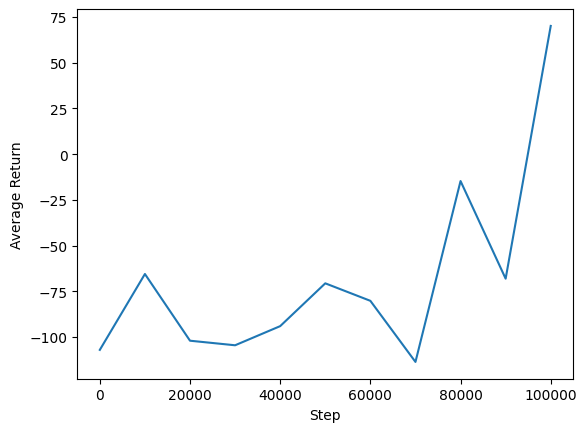

In [35]:
steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim()

In [36]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  '''.format(b64.decode())

  return IPython.display.HTML(tag)

In [39]:
VERSION_NUMBER = 'v1'

In [37]:
num_episodes = 3
video_filename = f'bipedal_walker_normal_{VERSION_NUMBER}.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_env.render())
    while not time_step.is_last():
      action_step = eval_actor.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_env.render())

embed_mp4(video_filename)